In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']


In [2]:

#Print number of countries by landmass, or continent
print(df['landmass'].value_counts())

#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df['landmass'].isin([3,6])]

# Convert columns to numeric data types
df_36[var] = df_36[var].apply(pd.to_numeric, errors='coerce')

#Print the average values of the predictors for Europe and Oceania
print(df_36.groupby('landmass')[var].mean().T)

#Create labels for only Europe and Oceania
labels = df_36['landmass']

#Print the variable types for the predictors
print(df_36[var].dtypes)

#Create dummy variables for categorical predictors
data = pd.get_dummies(df_36[var])

landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64
landmass         3     6
red       0.828571  0.80
green     0.200000  0.20
blue      0.514286  0.80
gold      0.428571  0.60
white     0.771429  0.95
black     0.171429  0.15
orange    0.057143  0.15
mainhue        NaN   NaN
bars      0.628571  0.00
stripes   1.285714  0.40
circles   0.028571  0.15
crosses   0.285714  0.40
saltires  0.028571  0.30
quarters  0.028571  0.40
sunstars  0.142857  3.30
triangle  0.028571  0.25
animate   0.114286  0.30
red           int64
green         int64
blue          int64
gold          int64
white         int64
black         int64
orange        int64
mainhue     float64
bars          int64
stripes       int64
circles       int64
crosses       int64
saltires      int64
quarters      int64
sunstars      int64
triangle      int64
animate       int64
dtype: object


C:\Users\cuate\AppData\Local\Temp\ipykernel_15456\2822294573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_36[var] = df_36[var].apply(pd.to_numeric, errors='coerce')


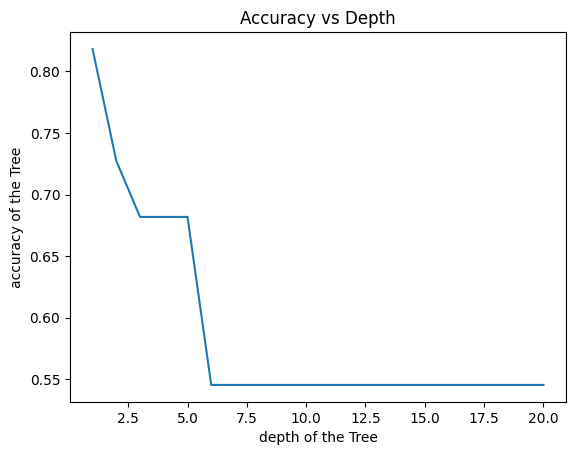

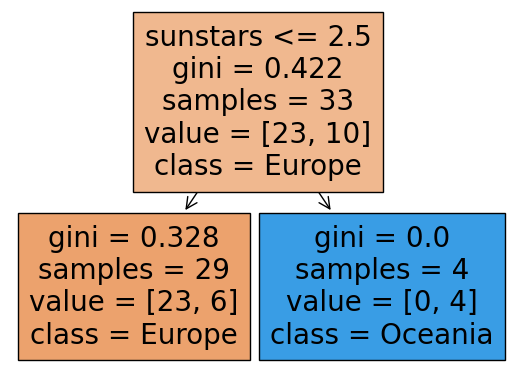

In [3]:
#Split data into a train and test set
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size=0.4, random_state=1)

#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for items in depths:
  dtree = DecisionTreeClassifier(random_state=10,max_depth = items)
  dtree.fit(x_train,y_train)
  acc_depth.append(dtree.score(x_test,y_test))


#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('depth of the Tree')
plt.ylabel('accuracy of the Tree')
plt.title('Accuracy vs Depth')
plt.show()
plt.close()

#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]

#Refit decision tree model with the highest accuracy and plot the decision tree
dtree_ha = DecisionTreeClassifier(random_state=10,max_depth = best_depth)
dtree_ha.fit(x_train,y_train)
tree.plot_tree(dtree_ha, feature_names = x_train.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()
plt.close()

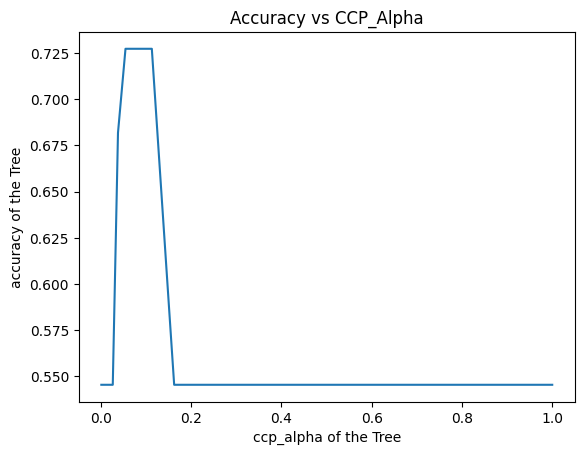

In [4]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for items in ccp:
  dt_prune = DecisionTreeClassifier(random_state=10,ccp_alpha = items)
  dt_prune.fit(x_train,y_train)
  acc_pruned.append(dt_prune.score(x_test,y_test))

#Plot the accuracy vs ccp_alpha
plt.plot(ccp, acc_pruned)
plt.xlabel('ccp_alpha of the Tree')
plt.ylabel('accuracy of the Tree')
plt.title('Accuracy vs CCP_Alpha')
plt.show()
plt.close()